In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#Importing Dataset
data=pd.read_csv("/content/bse_reliance.csv")
data.shape 
#data has 2243 rows and 13 columns

(2243, 13)

In [3]:
data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,19-February-2021,2065.00,2104.95,2058.00,2080.55,2088.640078,398673,17549,8.326844e+08,77916.0,19.54,46.95,15.55
1,18-February-2021,2085.75,2107.70,2059.70,2065.50,2086.172102,298538,14233,6.228016e+08,61715.0,20.67,48.00,-20.25
2,17-February-2021,2058.00,2095.00,2050.85,2082.75,2076.980093,692483,38911,1.438273e+09,305537.0,44.12,44.15,24.75
3,16-February-2021,2040.00,2079.00,2037.50,2059.65,2061.478522,361465,17723,7.451523e+08,92295.0,25.53,41.50,19.65
4,15-February-2021,2049.00,2060.55,2025.40,2032.60,2042.728737,325784,14989,6.654883e+08,48870.0,15.00,35.15,-16.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,8-February-2012,848.00,864.45,845.00,858.05,857.320337,945448,20363,8.105518e+08,362375.0,38.33,19.45,10.05
2239,7-February-2012,841.00,852.40,834.95,844.75,846.617308,1011946,22870,8.567310e+08,371859.0,36.75,17.45,3.75
2240,6-February-2012,843.00,849.00,824.00,832.75,834.675883,550496,16933,4.594857e+08,162179.0,29.46,25.00,-10.25
2241,3-February-2012,832.00,839.40,815.55,837.75,827.906971,660802,15706,5.470826e+08,229118.0,34.67,23.85,5.75


In [4]:
data['Log Return'] = np.log(data['Close Price']/data['Close Price'].shift(1))

# Data Preprocessing and Visualization

In [5]:
#sorting
data = data.sort_index(ascending=True, axis=0)

In [6]:
#removing NULL values
data.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
Log Return                   1
dtype: int64

In [7]:
data=data.dropna()
data.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
Log Return                   0
dtype: int64

### Plots

In [8]:
#setting index as date 
data['Date'] = pd.to_datetime(data.Date,format='%d-%B-%Y')
data.index = data['Date']

#sorting
data = data.sort_index(ascending=True, axis=0)

In [9]:
data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Log Return
Date,,,,,,,,,,,,,,
2012-02-02,2012-02-02,836.50,842.35,824.00,828.60,831.894310,696934,17024,5.797754e+08,224017.0,32.14,18.35,-7.90,-0.010982
2012-02-03,2012-02-03,832.00,839.40,815.55,837.75,827.906971,660802,15706,5.470826e+08,229118.0,34.67,23.85,5.75,0.005986
2012-02-06,2012-02-06,843.00,849.00,824.00,832.75,834.675883,550496,16933,4.594857e+08,162179.0,29.46,25.00,-10.25,-0.014307
2012-02-07,2012-02-07,841.00,852.40,834.95,844.75,846.617308,1011946,22870,8.567310e+08,371859.0,36.75,17.45,3.75,-0.015622
2012-02-08,2012-02-08,848.00,864.45,845.00,858.05,857.320337,945448,20363,8.105518e+08,362375.0,38.33,19.45,10.05,0.006313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2021-02-12,2059.70,2077.50,2015.55,2041.25,2051.007975,640628,27971,1.313933e+09,88301.0,13.78,61.95,-18.45,0.004247
2021-02-15,2021-02-15,2049.00,2060.55,2025.40,2032.60,2042.728737,325784,14989,6.654883e+08,48870.0,15.00,35.15,-16.40,-0.013220
2021-02-16,2021-02-16,2040.00,2079.00,2037.50,2059.65,2061.478522,361465,17723,7.451523e+08,92295.0,25.53,41.50,19.65,-0.011153


Text(0.5, 0, 'Close Price History')

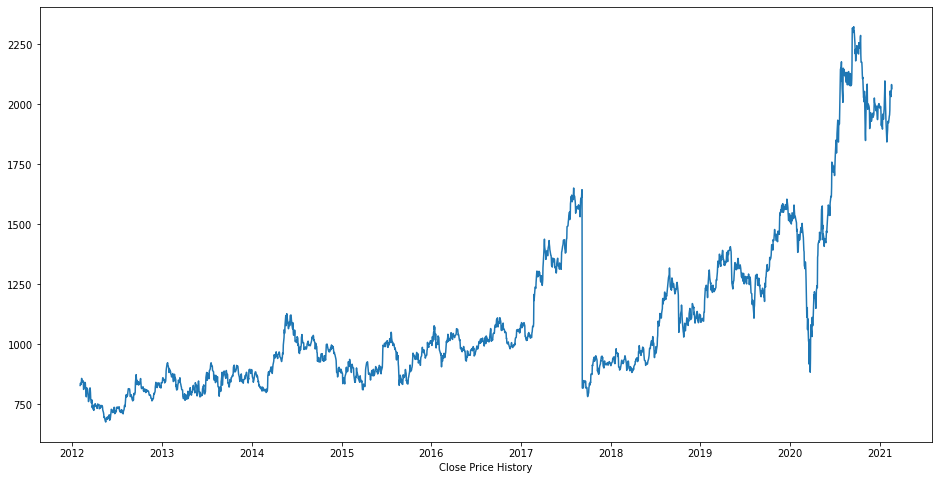

In [10]:
#plot of CLOSE PRICE 
plt.figure(figsize=(16,8))
plt.plot(data['Close Price'])
plt.xlabel('Close Price History')

In [11]:
# plt.figure(figsize=(16,8))
# plt.plot(data['Log Return'])
# plt.xlabel('Log Return History')

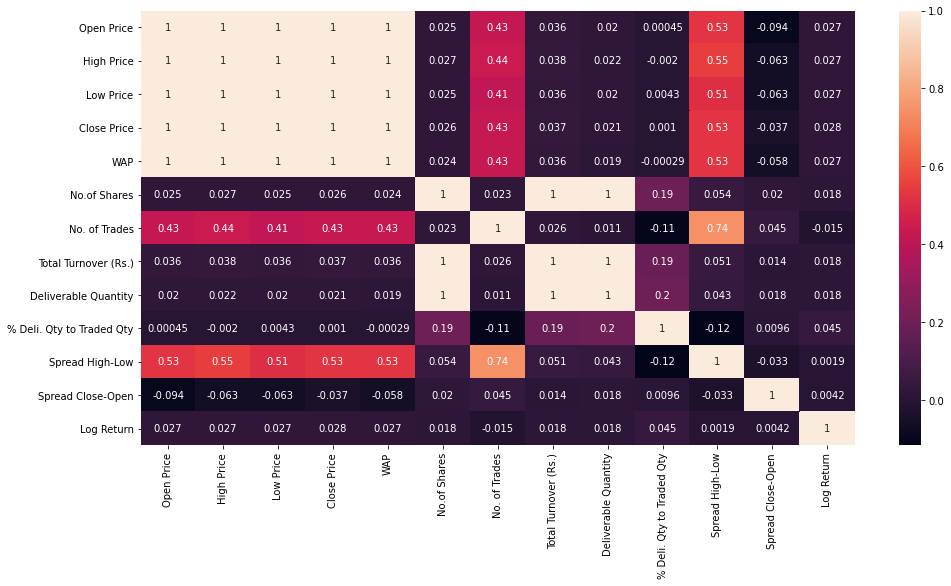

In [12]:
#Correlation Matrix
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(16,8))
sns.heatmap(corrdata,annot=True)

In [14]:
#creating a separate dataset with relevant columns(features)
new_data = pd.DataFrame(index=data['Date'],columns=["Date",'Close Price','No.of Shares','No. of Trades','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open']) #"Open Price",'High Price',"Low Price",
#'Open Price''High Price',"Low Price",
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    #new_data['Open Price'][i]=data['Open Price'][i]
    new_data['Close Price'][i] = data['Close Price'][i]
    #new_data['High Price'][i] = data['High Price'][i]
    #new_data['Low Price'][i] = data['Low Price'][i]
    new_data['No.of Shares'][i] = data['No.of Shares'][i]
    new_data['No. of Trades'][i] = data['No. of Trades'][i]
    new_data['% Deli. Qty to Traded Qty'][i] = data['% Deli. Qty to Traded Qty'][i]
    new_data['Spread High-Low'][i] = data['Spread High-Low'][i]
    new_data['Spread Close-Open'][i] = data['Spread Close-Open'][i]

In [15]:
new_data

,Date,Close Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,
2012-02-02,2012-02-02 00:00:00,828.6,696934,17024,32.14,18.35,-7.9
2012-02-03,2012-02-03 00:00:00,837.75,660802,15706,34.67,23.85,5.75
2012-02-06,2012-02-06 00:00:00,832.75,550496,16933,29.46,25,-10.25
2012-02-07,2012-02-07 00:00:00,844.75,1011946,22870,36.75,17.45,3.75
2012-02-08,2012-02-08 00:00:00,858.05,945448,20363,38.33,19.45,10.05
...,...,...,...,...,...,...,...
2021-02-12,2021-02-12 00:00:00,2041.25,640628,27971,13.78,61.95,-18.45
2021-02-15,2021-02-15 00:00:00,2032.6,325784,14989,15,35.15,-16.4
2021-02-16,2021-02-16 00:00:00,2059.65,361465,17723,25.53,41.5,19.65


In [18]:
new_data_ts = new_data

In [19]:
pip install fastai

In [20]:
#converting date to usable features 
from fastai.tabular import add_datepart
add_datepart(new_data_ts,'Date')

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


,Close Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,
2012-02-02,828.6,696934,17024,32.14,18.35,-7.9,2012,2,5,2,3,33,False,False,False,False,False,False,1328140800
2012-02-03,837.75,660802,15706,34.67,23.85,5.75,2012,2,5,3,4,34,False,False,False,False,False,False,1328227200
2012-02-06,832.75,550496,16933,29.46,25,-10.25,2012,2,6,6,0,37,False,False,False,False,False,False,1328486400
2012-02-07,844.75,1011946,22870,36.75,17.45,3.75,2012,2,6,7,1,38,False,False,False,False,False,False,1328572800
2012-02-08,858.05,945448,20363,38.33,19.45,10.05,2012,2,6,8,2,39,False,False,False,False,False,False,1328659200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2041.25,640628,27971,13.78,61.95,-18.45,2021,2,6,12,4,43,False,False,False,False,False,False,1613088000
2021-02-15,2032.6,325784,14989,15,35.15,-16.4,2021,2,7,15,0,46,False,False,False,False,False,False,1613347200
2021-02-16,2059.65,361465,17723,25.53,41.5,19.65,2021,2,7,16,1,47,False,False,False,False,False,False,1613433600


In [21]:
#adding a new feature that gives importance to the first and last day of the week 
new_data_ts['mon_fri'] = 0
for i in range(0,len(new_data_ts)):
    if (new_data_ts['Dayofweek'][i] == 0 or new_data_ts['Dayofweek'][i] == 4):
        new_data_ts['mon_fri'][i] = 1
    else:
        new_data_ts['mon_fri'][i] = 0
new_data_ts.drop('Elapsed',axis='columns',inplace=True) #this gives the time stamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
new_data_ts

,Close Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,,,,,,,
2012-02-02,828.6,696934,17024,32.14,18.35,-7.9,2012,2,5,2,3,33,False,False,False,False,False,False,0
2012-02-03,837.75,660802,15706,34.67,23.85,5.75,2012,2,5,3,4,34,False,False,False,False,False,False,1
2012-02-06,832.75,550496,16933,29.46,25,-10.25,2012,2,6,6,0,37,False,False,False,False,False,False,1
2012-02-07,844.75,1011946,22870,36.75,17.45,3.75,2012,2,6,7,1,38,False,False,False,False,False,False,0
2012-02-08,858.05,945448,20363,38.33,19.45,10.05,2012,2,6,8,2,39,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2041.25,640628,27971,13.78,61.95,-18.45,2021,2,6,12,4,43,False,False,False,False,False,False,1
2021-02-15,2032.6,325784,14989,15,35.15,-16.4,2021,2,7,15,0,46,False,False,False,False,False,False,1
2021-02-16,2059.65,361465,17723,25.53,41.5,19.65,2021,2,7,16,1,47,False,False,False,False,False,False,0


## Data Normalization

In [23]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
names = new_data_ts.columns
d = scaler.fit_transform(new_data_ts)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.dropna()
scaled_data

,Close Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,0.092495,0.001712,0.139880,0.287605,0.077059,0.510939,0.0,0.090909,0.076923,0.033333,0.500000,0.087671,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.098049,0.001621,0.128634,0.314181,0.104851,0.557967,0.0,0.090909,0.076923,0.066667,0.666667,0.090411,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.095014,0.001343,0.139104,0.259454,0.110662,0.502842,0.0,0.090909,0.096154,0.166667,0.000000,0.098630,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.102297,0.002505,0.189764,0.336029,0.072511,0.551077,0.0,0.090909,0.096154,0.200000,0.166667,0.101370,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.110369,0.002337,0.168372,0.352626,0.082617,0.572782,0.0,0.090909,0.096154,0.233333,0.333333,0.104110,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,0.828483,0.001570,0.233290,0.094748,0.297372,0.474591,1.0,0.090909,0.096154,0.366667,0.666667,0.115068,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2237,0.823233,0.000778,0.122516,0.107563,0.161950,0.481654,1.0,0.090909,0.115385,0.466667,0.000000,0.123288,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2238,0.839650,0.000867,0.145845,0.218172,0.194037,0.605857,1.0,0.090909,0.115385,0.500000,0.166667,0.126027,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,0.853670,0.001701,0.326641,0.413445,0.207428,0.623428,1.0,0.090909,0.115385,0.533333,0.333333,0.128767,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building Models

In [24]:
X=scaled_data.drop('Close Price', axis =1)
Y=scaled_data['Close Price']

In [25]:
#split data into train and test
x_train = X[:1458]
x_test = X[1458:]
y_train = Y[:1458]
y_test = Y[1458:]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)

preds1 = model_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds1)))
print(r2_score(y_test,preds1))

0.21718063319154393
0.13607336462326247


In [27]:
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):
    prediction = model.predict(X_test)
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

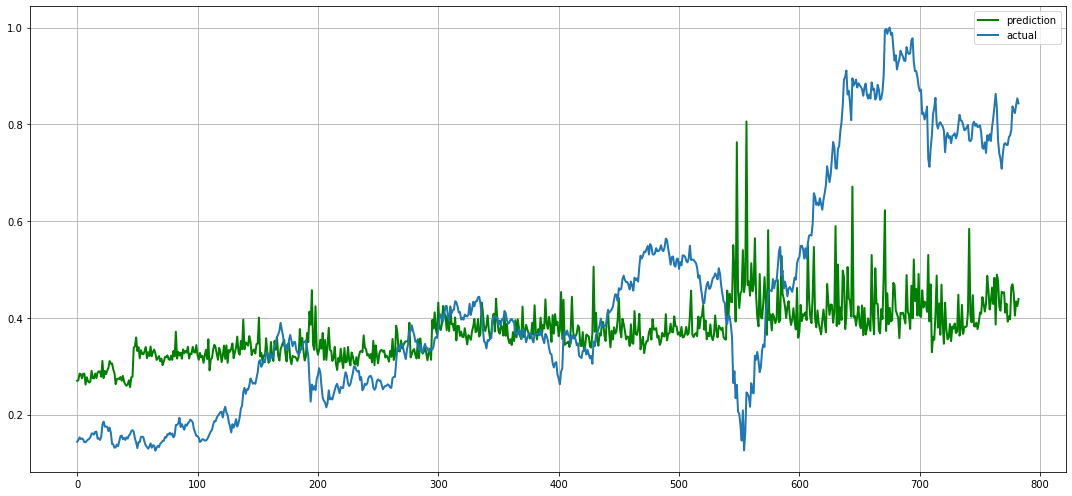

In [28]:
plotModelResults(model_lin, plot_intervals=True)

Ridge Regression

In [29]:
#taking alpha as 1 randomly
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(x_train,y_train)

preds2 = model_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds2)))
print(r2_score(y_test,preds2))

0.2011220496546831
0.25910946537850343


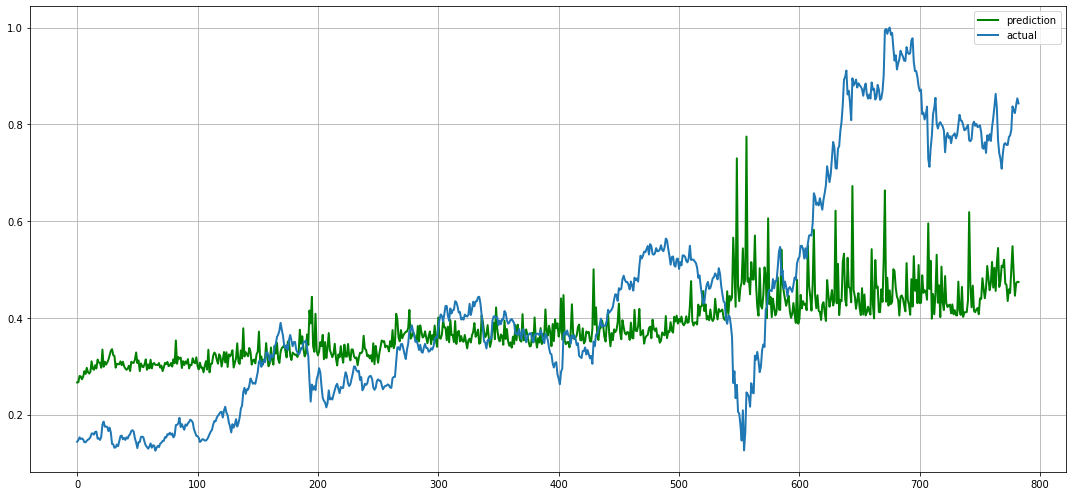

In [30]:
plotModelResults(model_ridge, plot_intervals=True)

Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(x_train,y_train)

preds4 = model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds4)))
print(r2_score(y_test,preds4))

0.19813351681619668
0.2809641068359372


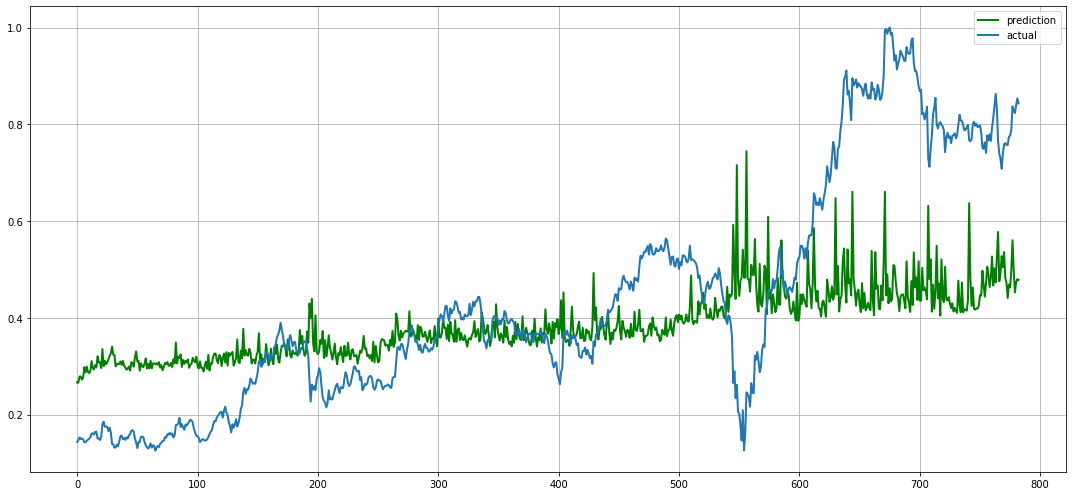

In [32]:
plotModelResults(model_lasso, plot_intervals=True)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=6)

In [34]:
model_knn.fit(x_train,y_train)
pred = model_knn.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test,pred))

0.3033094905082993
-0.685026257765154


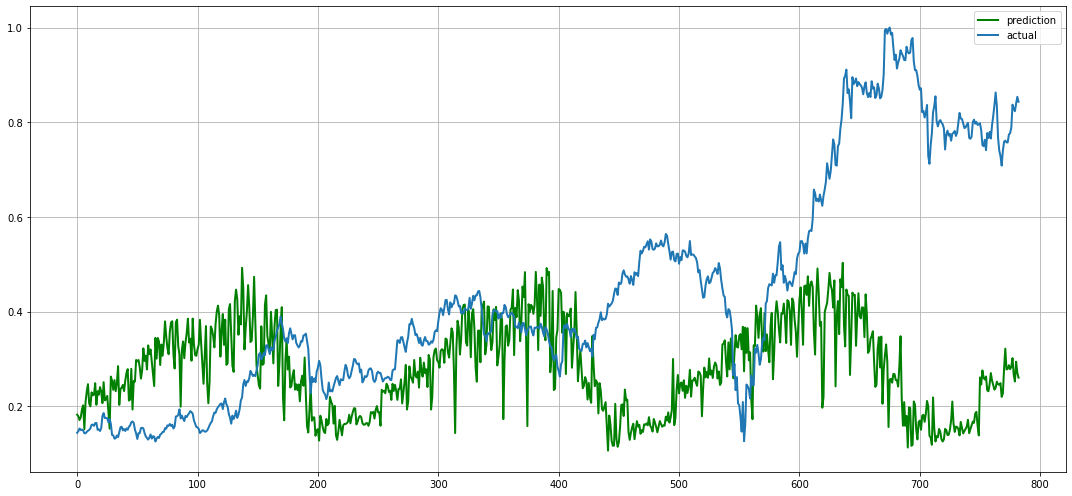

In [35]:
plotModelResults(model_knn, plot_intervals=True)

In [42]:
from sklearn.svm import SVR
model_svm = SVR(kernel='linear')
model_svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
pred5 = model_svm.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred5)))
print(r2_score(y_test,pred5))

0.21413627719544692
0.16012400227849033


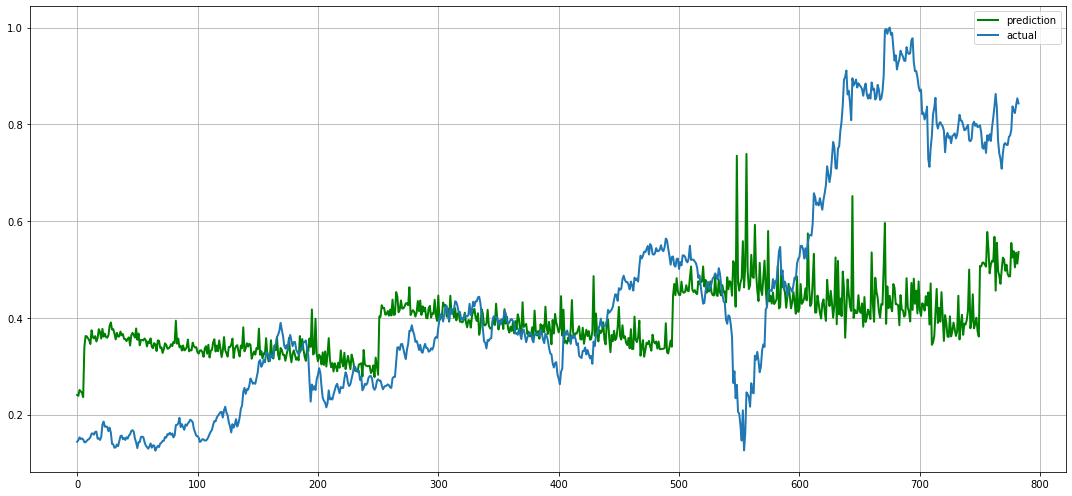

In [44]:
plotModelResults(model_svm, plot_intervals=True)

In [ ]:
#creating a separate dataset with all columns(features)
new_data = pd.DataFrame(index=data['Date'],columns=["Date",'Close Price','Open Price','High Price',"Low Price",'No.of Shares','No. of Trades','% Deli. Qty to Traded Qty','Spread High-Low','Spread Close-Open']) #"Open Price",'High Price',"Low Price",

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open Price'][i]=data['Open Price'][i]
    new_data['Close Price'][i] = data['Close Price'][i]
    new_data['High Price'][i] = data['High Price'][i]
    new_data['Low Price'][i] = data['Low Price'][i]
    new_data['No.of Shares'][i] = data['No.of Shares'][i]
    new_data['No. of Trades'][i] = data['No. of Trades'][i]
    new_data['% Deli. Qty to Traded Qty'][i] = data['% Deli. Qty to Traded Qty'][i]
    new_data['Spread High-Low'][i] = data['Spread High-Low'][i]
    new_data['Spread Close-Open'][i] = data['Spread Close-Open'][i]

In [ ]:
new_data

,Date,Close Price,Open Price,High Price,Low Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,
2012-02-02,2012-02-02 00:00:00,828.6,836.5,842.35,824,696934,17024,32.14,18.35,-7.9
2012-02-03,2012-02-03 00:00:00,837.75,832,839.4,815.55,660802,15706,34.67,23.85,5.75
2012-02-06,2012-02-06 00:00:00,832.75,843,849,824,550496,16933,29.46,25,-10.25
2012-02-07,2012-02-07 00:00:00,844.75,841,852.4,834.95,1011946,22870,36.75,17.45,3.75
2012-02-08,2012-02-08 00:00:00,858.05,848,864.45,845,945448,20363,38.33,19.45,10.05
...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2021-02-12 00:00:00,2041.25,2059.7,2077.5,2015.55,640628,27971,13.78,61.95,-18.45
2021-02-15,2021-02-15 00:00:00,2032.6,2049,2060.55,2025.4,325784,14989,15,35.15,-16.4
2021-02-16,2021-02-16 00:00:00,2059.65,2040,2079,2037.5,361465,17723,25.53,41.5,19.65


In [ ]:
new_data_ts = new_data

In [ ]:
pip install fastai

In [ ]:
#converting date to usable features 
from fastai.tabular import add_datepart
add_datepart(new_data_ts,'Date')

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


,Close Price,Open Price,High Price,Low Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,,
2012-02-02,828.6,836.5,842.35,824,696934,17024,32.14,18.35,-7.9,2012,2,5,2,3,33,False,False,False,False,False,False,1328140800
2012-02-03,837.75,832,839.4,815.55,660802,15706,34.67,23.85,5.75,2012,2,5,3,4,34,False,False,False,False,False,False,1328227200
2012-02-06,832.75,843,849,824,550496,16933,29.46,25,-10.25,2012,2,6,6,0,37,False,False,False,False,False,False,1328486400
2012-02-07,844.75,841,852.4,834.95,1011946,22870,36.75,17.45,3.75,2012,2,6,7,1,38,False,False,False,False,False,False,1328572800
2012-02-08,858.05,848,864.45,845,945448,20363,38.33,19.45,10.05,2012,2,6,8,2,39,False,False,False,False,False,False,1328659200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2041.25,2059.7,2077.5,2015.55,640628,27971,13.78,61.95,-18.45,2021,2,6,12,4,43,False,False,False,False,False,False,1613088000
2021-02-15,2032.6,2049,2060.55,2025.4,325784,14989,15,35.15,-16.4,2021,2,7,15,0,46,False,False,False,False,False,False,1613347200
2021-02-16,2059.65,2040,2079,2037.5,361465,17723,25.53,41.5,19.65,2021,2,7,16,1,47,False,False,False,False,False,False,1613433600


In [ ]:
#adding a new feature that gives importance to the first and last day of the week 
new_data_ts['mon_fri'] = 0
for i in range(0,len(new_data_ts)):
    if (new_data_ts['Dayofweek'][i] == 0 or new_data_ts['Dayofweek'][i] == 4):
        new_data_ts['mon_fri'][i] = 1
    else:
        new_data_ts['mon_fri'][i] = 0
new_data_ts.drop('Elapsed',axis='columns',inplace=True) #this gives the time stamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
new_data_ts

,Close Price,Open Price,High Price,Low Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,,
2012-02-02,828.6,836.5,842.35,824,696934,17024,32.14,18.35,-7.9,2012,2,5,2,3,33,False,False,False,False,False,False,0
2012-02-03,837.75,832,839.4,815.55,660802,15706,34.67,23.85,5.75,2012,2,5,3,4,34,False,False,False,False,False,False,1
2012-02-06,832.75,843,849,824,550496,16933,29.46,25,-10.25,2012,2,6,6,0,37,False,False,False,False,False,False,1
2012-02-07,844.75,841,852.4,834.95,1011946,22870,36.75,17.45,3.75,2012,2,6,7,1,38,False,False,False,False,False,False,0
2012-02-08,858.05,848,864.45,845,945448,20363,38.33,19.45,10.05,2012,2,6,8,2,39,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2041.25,2059.7,2077.5,2015.55,640628,27971,13.78,61.95,-18.45,2021,2,6,12,4,43,False,False,False,False,False,False,1
2021-02-15,2032.6,2049,2060.55,2025.4,325784,14989,15,35.15,-16.4,2021,2,7,15,0,46,False,False,False,False,False,False,1
2021-02-16,2059.65,2040,2079,2037.5,361465,17723,25.53,41.5,19.65,2021,2,7,16,1,47,False,False,False,False,False,False,0


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
names = new_data_ts.columns
d = scaler.fit_transform(new_data_ts)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data.dropna()
scaled_data

,Close Price,Open Price,High Price,Low Price,No.of Shares,No. of Trades,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,0.092495,0.097956,0.094659,0.093250,0.001712,0.139880,0.287605,0.077059,0.510939,0.0,0.090909,0.076923,0.033333,0.500000,0.087671,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.098049,0.095227,0.092909,0.088100,0.001621,0.128634,0.314181,0.104851,0.557967,0.0,0.090909,0.076923,0.066667,0.666667,0.090411,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.095014,0.101898,0.098603,0.093250,0.001343,0.139104,0.259454,0.110662,0.502842,0.0,0.090909,0.096154,0.166667,0.000000,0.098630,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.102297,0.100685,0.100620,0.099924,0.002505,0.189764,0.336029,0.072511,0.551077,0.0,0.090909,0.096154,0.200000,0.166667,0.101370,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.110369,0.104931,0.107767,0.106049,0.002337,0.168372,0.352626,0.082617,0.572782,0.0,0.090909,0.096154,0.233333,0.333333,0.104110,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,0.828483,0.839874,0.827229,0.819473,0.001570,0.233290,0.094748,0.297372,0.474591,1.0,0.090909,0.096154,0.366667,0.666667,0.115068,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2237,0.823233,0.833384,0.817176,0.825476,0.000778,0.122516,0.107563,0.161950,0.481654,1.0,0.090909,0.115385,0.466667,0.000000,0.123288,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2238,0.839650,0.827925,0.828119,0.832851,0.000867,0.145845,0.218172,0.194037,0.605857,1.0,0.090909,0.115385,0.500000,0.166667,0.126027,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,0.853670,0.838843,0.837609,0.840987,0.001701,0.326641,0.413445,0.207428,0.623428,1.0,0.090909,0.115385,0.533333,0.333333,0.128767,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=scaled_data.drop('Close Price', axis =1)
Y=scaled_data['Close Price']

In [ ]:
#split data into train and test
x_train = X[:1458]
x_test = X[1458:]
y_train = Y[:1458]
y_test = Y[1458:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)

preds1 = model_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds1)))
print(r2_score(y_test,preds1))

2.793841541000079e-16
1.0


In [ ]:
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):
    prediction = model.predict(X_test)
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

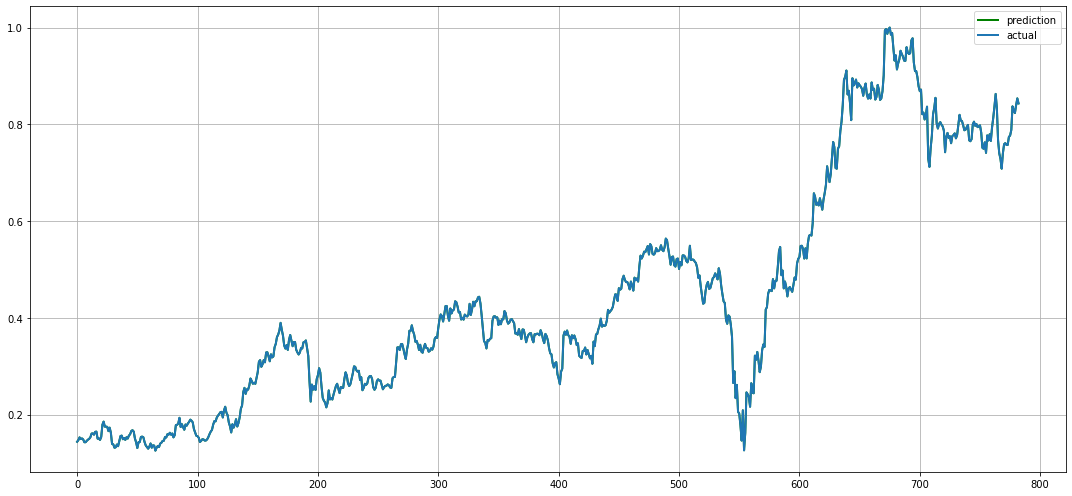

In [ ]:
plotModelResults(model_lin, plot_intervals=True)

In [ ]:
#taking alpha as 1 randomly
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(x_train,y_train)

preds2 = model_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds2)))
print(r2_score(y_test,preds2))

0.004979175707590706
0.9995459020115385


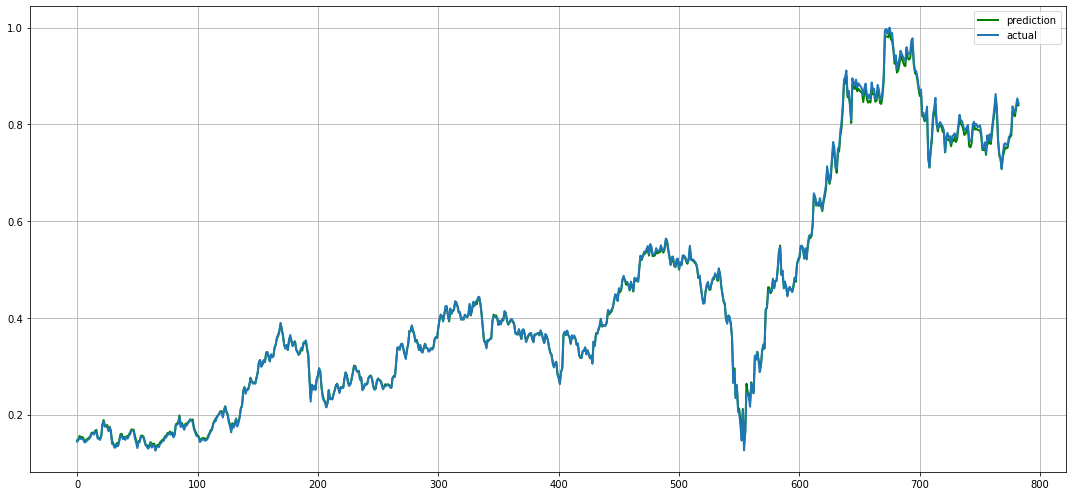

In [ ]:
plotModelResults(model_ridge, plot_intervals=True)

In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(x_train,y_train)

preds4 = model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, preds4)))
print(r2_score(y_test,preds4))

0.00551296371458451
0.9994433208673841


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005337263811354511, tolerance: 0.0017004014421628426
  positive)


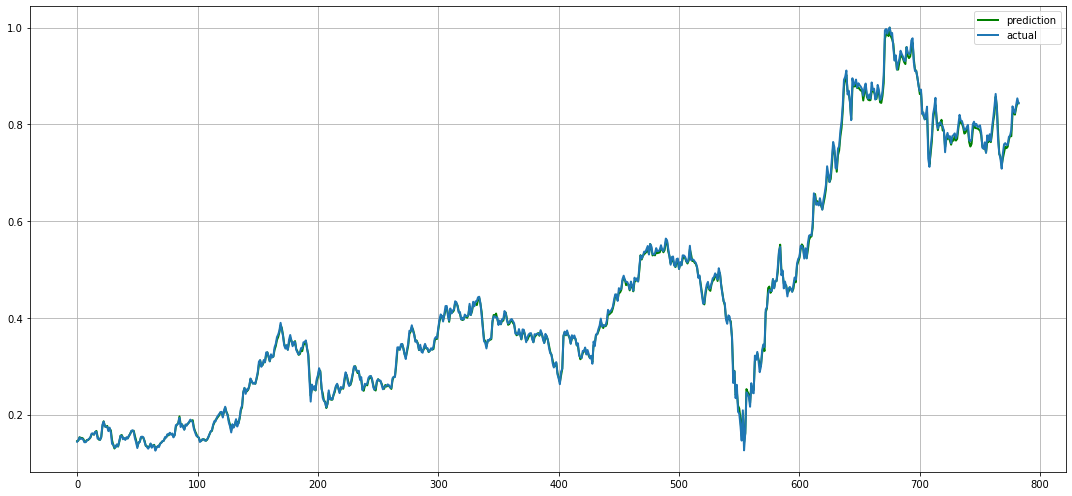

In [ ]:
plotModelResults(model_lasso, plot_intervals=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=6)

In [ ]:
model_knn.fit(x_train,y_train)
pred = model_knn.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test,pred))

0.1707893252551876
0.4657357441857316


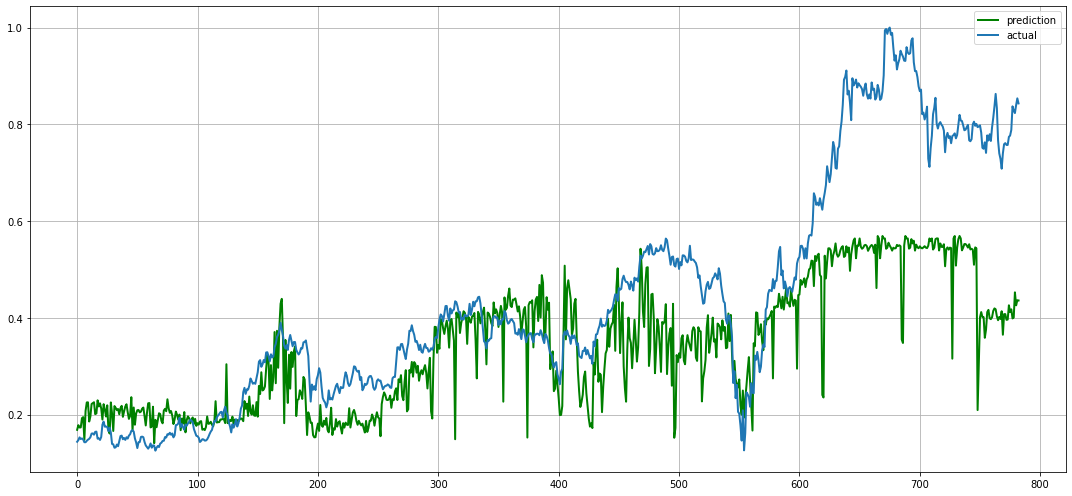

In [ ]:
plotModelResults(model_knn, plot_intervals=True)

In [ ]:
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred5 = model_svm.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred5)))
print(r2_score(y_test,pred5))

0.1838942176339435
0.3806005422522394


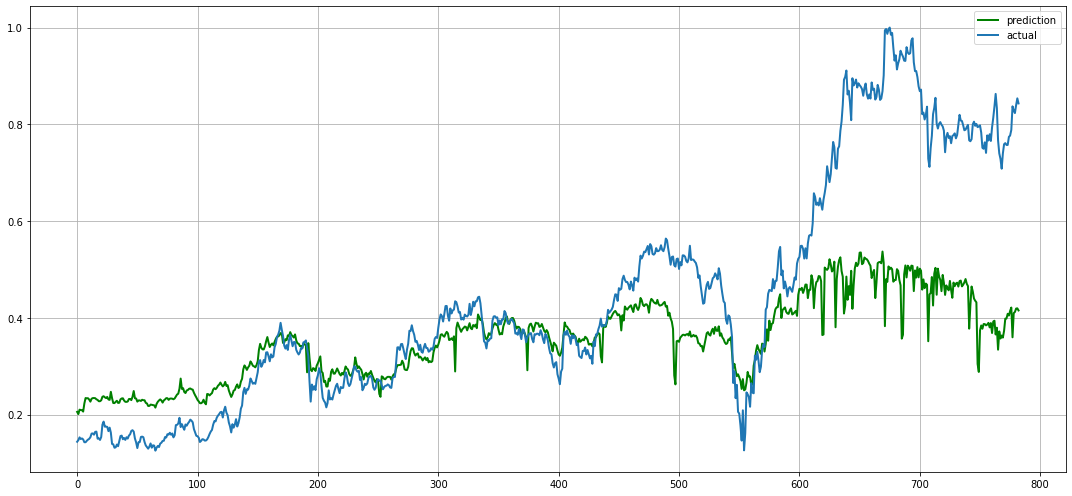

In [ ]:
plotModelResults(model_svm, plot_intervals=True)

In [ ]:
from sklearn.svm import SVR
model_svm2 = SVR(kernel='linear')
model_svm2.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred6 = model_svm2.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred6)))
print(r2_score(y_test,pred6))

0.09011716857020007
0.8512524744837324


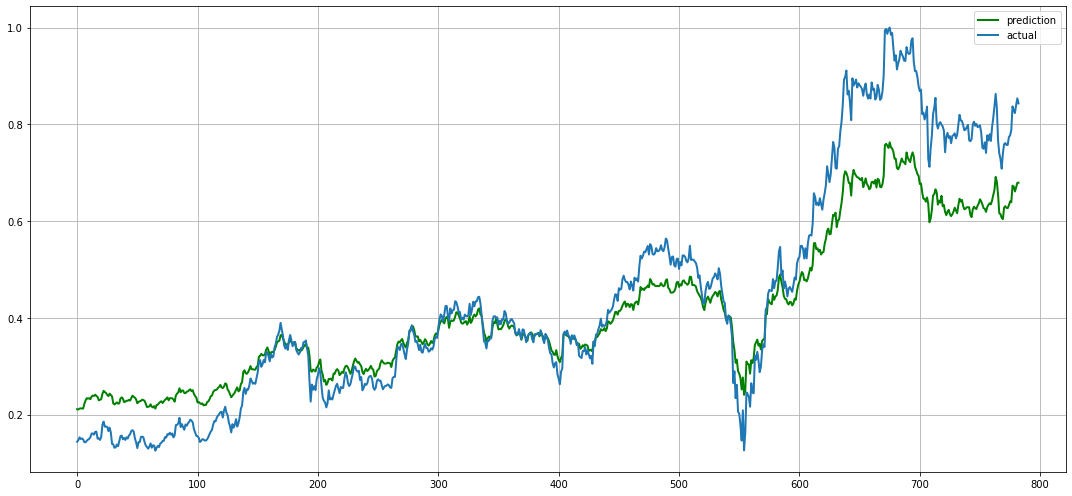

In [ ]:
plotModelResults(model_svm2, plot_intervals=True)